In [1]:
import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential, load_model
from keras.layers import Activation, Conv2D, Dense, Dropout, GlobalAveragePooling2D, MaxPool2D , Flatten, BatchNormalization
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l1_l2
from keras.optimizers import Adam, SGD, Adagrad, RMSprop, Adamax
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications import InceptionV3
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

from livelossplot import PlotLossesKeras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os import listdir
from os.path import isdir, isfile, join

2022-11-13 00:55:28.053904: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-13 00:55:28.053964: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
data_dir = '../../Datasets/Automobile-parts_Balanced_Trimmed/'

img_width = 300
img_height = 300

EPOCHS = 20
BATCH_SIZE = 32
LEARNING_RATE = 0.001

IMAGE_SHAPE = (img_width, img_height)

In [3]:
datagen = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=True,
    height_shift_range=0.3,
    width_shift_range=0.5,
    brightness_range=[0.1,0.9],
    rotation_range=90,
    validation_split=0.1,
    zoom_range=0.1
)

In [4]:
CLASSES = sorted(listdir(data_dir))
CLASSES

['Bevel-gear',
 'bearing',
 'clutch',
 'cylincer',
 'filter',
 'fuel-tank',
 'helical_gear',
 'piston',
 'rack-pinion',
 'shocker',
 'spark-plug',
 'spur-gear',
 'valve',
 'wheel']

In [5]:
train_gen = datagen.flow_from_directory(
    data_dir,
    color_mode="grayscale",
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes = CLASSES,
    subset='training',
    shuffle=True,
    seed=116,
)

validation_gen = datagen.flow_from_directory(
    data_dir,
    color_mode="grayscale",
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes = CLASSES,
    subset='validation',
    shuffle=True,
    seed=116,
)

Found 839 images belonging to 14 classes.
Found 84 images belonging to 14 classes.


In [6]:
for X,y in train_gen:
    print(X.shape)
    print(y.shape)
    break

(32, 300, 300, 1)
(32, 14)


2022-11-13 00:55:40.224145: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-13 00:55:40.229308: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-13 00:55:40.229377: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mylaptop-HP-ProBook-430-G1): /proc/driver/nvidia/version does not exist
2022-11-13 00:55:40.230465: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-13 00:55:40.490358: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                        

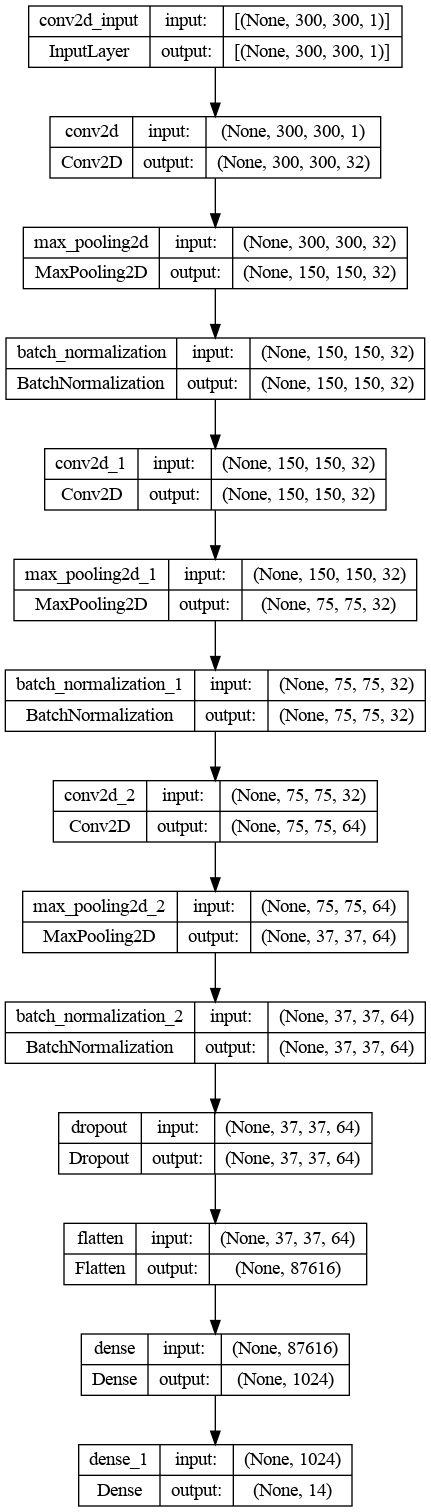

In [7]:
model = Sequential()

model.add(Conv2D(32, 3, padding="same", activation="relu", input_shape=( IMAGE_SHAPE+(1,) )))
model.add(MaxPool2D())

model.add(BatchNormalization())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(BatchNormalization())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(BatchNormalization())

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(len(CLASSES), activation='softmax'))


model.summary()

plot_model(model, to_file='CNN_Final.png', show_shapes=True, show_layer_names=True)

In [8]:
model.save_weights("./InitialModel_CNN.h5")

In [9]:
steps_for_each_epoch = train_gen.samples // BATCH_SIZE
validation_steps_for_each_epoch = validation_gen.samples // BATCH_SIZE

2022-11-13 00:55:55.870915: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 358875136 exceeds 10% of free system memory.


Epoch 1/20


2022-11-13 00:55:57.609670: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 358875136 exceeds 10% of free system memory.


26/26 [==============================] - ETA: 0s - loss: 26.9226 - accuracy: 0.0756
Epoch 1: val_accuracy improved from -inf to 0.09375, saving model to ./saved_models/CNNmodel_01-0.09.h5
26/26 [==============================] - 157s 6s/step - loss: 26.9226 - accuracy: 0.0756 - val_loss: 7.1625 - val_accuracy: 0.0938
Epoch 2/20
26/26 [==============================] - ETA: 0s - loss: 2.9937 - accuracy: 0.0805
Epoch 2: val_accuracy did not improve from 0.09375
26/26 [==============================] - 144s 6s/step - loss: 2.9937 - accuracy: 0.0805 - val_loss: 8.2264 - val_accuracy: 0.0625
Epoch 3/20
26/26 [==============================] - ETA: 0s - loss: 2.6958 - accuracy: 0.0942
Epoch 3: val_accuracy did not improve from 0.09375
26/26 [==============================] - 136s 5s/step - loss: 2.6958 - accuracy: 0.0942 - val_loss: 10.0821 - val_accuracy: 0.0625
Epoch 4/20
26/26 [==============================] - ETA: 0s - loss: 2.6799 - accuracy: 0.0905
Epoch 4: val_accuracy did not improv

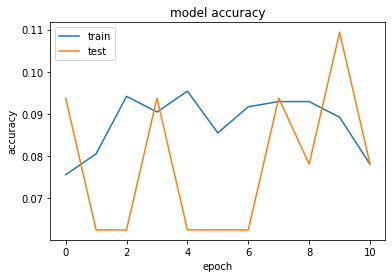

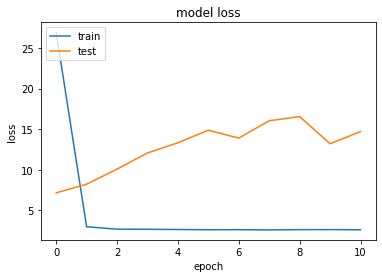

In [10]:
OPTIMIZER = Adam(learning_rate=LEARNING_RATE)

model.load_weights("./InitialModel_CNN.h5")
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

# File Path to store the trained models
filepath = "./saved_models/CNNmodel_{epoch:02d}-{val_accuracy:.2f}.h5"

# Using the ModelCheckpoint function to train and store all the best models
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

## Early stopping to stop over training
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode='min')

history = model.fit(
    train_gen, 
    epochs=EPOCHS, 
    steps_per_epoch=steps_for_each_epoch,
    validation_data=validation_gen,
    validation_steps=validation_steps_for_each_epoch,
    callbacks=[early_stop, checkpoint1],
    verbose=True
)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
data_dir = '../../Datasets/Trimmed Dataset'

img_width = 300
img_height = 300

EPOCHS = 20
BATCH_SIZE = 32
LEARNING_RATE = 0.001

IMAGE_SHAPE = (img_width, img_height)

In [19]:
datagen = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=True,
    height_shift_range=0.3,
    width_shift_range=0.5,
    brightness_range=[0.1,0.9],
    rotation_range=90,
    validation_split=0.1,
    zoom_range=0.1
)

In [20]:
train_gen = datagen.flow_from_directory(
    data_dir,
    color_mode="grayscale",
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes = CLASSES,
    subset='training',
    shuffle=True,
    seed=116,
)

validation_gen = datagen.flow_from_directory(
    data_dir,
    color_mode="grayscale",
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes = CLASSES,
    subset='validation',
    shuffle=True,
    seed=116,
)

Found 610 images belonging to 14 classes.
Found 60 images belonging to 14 classes.


In [21]:
for X,y in train_gen:
    print(X.shape)
    print(y.shape)
    break

(32, 300, 300, 1)
(32, 14)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 300, 300, 32)      320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 150, 150, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                      

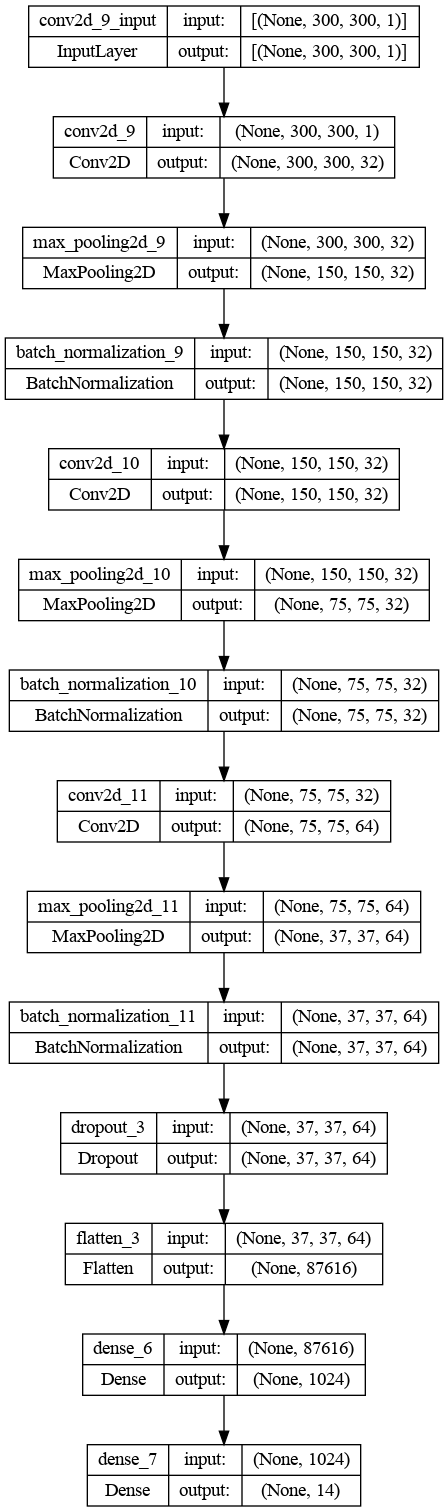

In [22]:
model2 = Sequential()

model2.add(Conv2D(32, 3, padding="same", activation="relu", input_shape=( IMAGE_SHAPE+(1,) )))
model2.add(MaxPool2D())

model2.add(BatchNormalization())

model2.add(Conv2D(32, 3, padding="same", activation="relu"))
model2.add(MaxPool2D())

model2.add(BatchNormalization())

model2.add(Conv2D(64, 3, padding="same", activation="relu"))
model2.add(MaxPool2D())

model2.add(BatchNormalization())

model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dense(1024, activation='relu'))
model2.add(Dense(len(CLASSES), activation='softmax'))


model2.summary()

plot_model(model2, to_file='CNN_Final.png', show_shapes=True, show_layer_names=True)

In [23]:
steps_for_each_epoch = train_gen.samples // BATCH_SIZE
validation_steps_for_each_epoch = validation_gen.samples // BATCH_SIZE

Epoch 1/20
19/19 [==============================] - ETA: 0s - loss: 45.5931 - accuracy: 0.0917
Epoch 1: val_accuracy improved from -inf to 0.06250, saving model to ./saved_models_only_trimmed/CNNmodel_01-0.06.h5
19/19 [==============================] - 113s 6s/step - loss: 45.5931 - accuracy: 0.0917 - val_loss: 7.0576 - val_accuracy: 0.0625
Epoch 2/20
19/19 [==============================] - ETA: 0s - loss: 9.5617 - accuracy: 0.0952
Epoch 2: val_accuracy did not improve from 0.06250
19/19 [==============================] - 106s 6s/step - loss: 9.5617 - accuracy: 0.0952 - val_loss: 5.6760 - val_accuracy: 0.0312
Epoch 3/20
19/19 [==============================] - ETA: 0s - loss: 2.8887 - accuracy: 0.0848
Epoch 3: val_accuracy did not improve from 0.06250
19/19 [==============================] - 104s 5s/step - loss: 2.8887 - accuracy: 0.0848 - val_loss: 6.6010 - val_accuracy: 0.0312
Epoch 4/20
19/19 [==============================] - ETA: 0s - loss: 2.6706 - accuracy: 0.1349
Epoch 4: val_

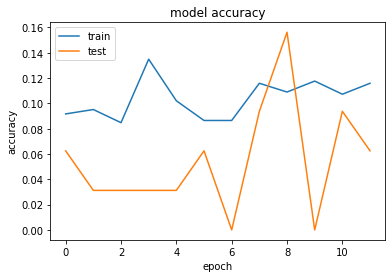

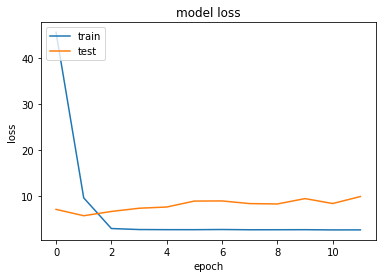

In [24]:
OPTIMIZER = Adam(learning_rate=LEARNING_RATE)

model2.load_weights("./InitialModel_CNN.h5")
model2.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

# File Path to store the trained models
filepath = "./saved_models_only_trimmed/CNNmodel_{epoch:02d}-{val_accuracy:.2f}.h5"

# Using the ModelCheckpoint function to train and store all the best models
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

## Early stopping to stop over training
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode='min')

history = model2.fit(
    train_gen, 
    epochs=EPOCHS, 
    steps_per_epoch=steps_for_each_epoch,
    validation_data=validation_gen,
    validation_steps=validation_steps_for_each_epoch,
    callbacks=[early_stop, checkpoint1],
    verbose=True
)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/40

Epoch 1: val_accuracy did not improve from 0.15625
19/19 - 110s - loss: 3.0249 - accuracy: 0.0900 - val_loss: 5.2863 - val_accuracy: 0.0312 - 110s/epoch - 6s/step
Epoch 2/40

Epoch 2: val_accuracy improved from 0.15625 to 0.18750, saving model to ./saved_models_only_trimmed/CNNmodel_02-0.19.h5
19/19 - 110s - loss: 2.7055 - accuracy: 0.0865 - val_loss: 4.5866 - val_accuracy: 0.1875 - 110s/epoch - 6s/step
Epoch 3/40

Epoch 3: val_accuracy did not improve from 0.18750
19/19 - 97s - loss: 2.6665 - accuracy: 0.0917 - val_loss: 4.9901 - val_accuracy: 0.0312 - 97s/epoch - 5s/step
Epoch 4/40

Epoch 4: val_accuracy did not improve from 0.18750
19/19 - 95s - loss: 2.6455 - accuracy: 0.0865 - val_loss: 7.0546 - val_accuracy: 0.0625 - 95s/epoch - 5s/step
Epoch 5/40

Epoch 5: val_accuracy did not improve from 0.18750
19/19 - 90s - loss: 2.6301 - accuracy: 0.0952 - val_loss: 6.8876 - val_accuracy: 0.0000e+00 - 90s/epoch - 5s/step
Epoch 6/40

Epoch 6: val_accuracy did not improve from 0.1

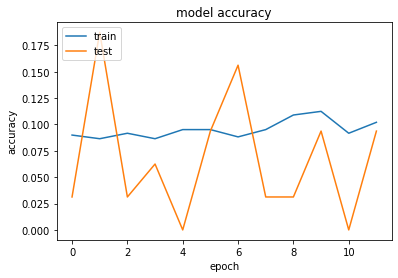

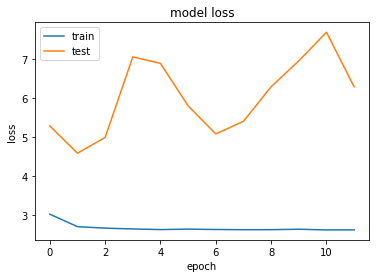

In [25]:
history = model2.fit(
    train_gen, 
    epochs=EPOCHS*2, 
    steps_per_epoch=steps_for_each_epoch,
    validation_data=validation_gen,
    validation_steps=validation_steps_for_each_epoch,
    callbacks=[early_stop, checkpoint1],
    verbose=2,
)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()